In [1]:
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
from ptyrex import np
from ptyrex import plt
from ptyrex import tb
from ptyrex import h5py

ImportError: No module named 'cv2'


2020-06-19 13:19:57,144:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import json
#json_dir = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/scancrop_64_Au/'
#json_name = '154728_scancrop_64_Au_v0_bindiff4_crop64_2x2_modes_db'
#json_name = 'original_data'

#json_dir = '/dls/e02/data/2020/cm26481-1/processing/Merlin/20200130_80kV_graphene_600C_pty/20200131_140834/'
#json_name = '001_20200417-132156_db'
#json_name = 'temp_db'


json_dir = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/Darren/'
json_name = 'AuGe_n77df'

In [3]:
pty_data, pty_model, pty_params = ptyrex.reconstruct.launcher.configure(['', json_dir, json_name, 0000])
pty_plot = ptyrex.display.plotting.Plot()
pty_plot.start_plotting_service('none')
pty_data, pty_model = ptyrex.reconstruct.launcher.data_loader(pty_data, pty_model, pty_params)


2020-06-19 13:19:57,244:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/display/plotting.py:48:No valid display set. disp=none
2020-06-19 13:19:57,246:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/display/plotting.py:49:Continuing without plotting.
2020-06-19 13:19:57,247:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:109:/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 160536/pty_data_20191002_160536.h5
2020-06-19 13:19:57,339:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:112:Data file: /dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 160536/pty_data_20191002_160536.h5


frame size: 265225
n frames: 64515


2020-06-19 13:20:01,881:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:289:raw shape:(64515, 515, 515)
2020-06-19 13:20:01,884:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:290:top:3, bottom:515, left:0, right:512


raw sum shape: (515, 515)
dp shape: (515, 515)
Calculated optic axis: [250. 266.]
pos_x shape (64515,)
scan shape: (64515, 2)
selected positions: (64, 2)


2020-06-19 13:20:04,457:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:323:No meta data for normalisation!


Not normalising data
raw data shape: (64, 512, 512)
Data preprocess..
processed data shape: (64, 512, 512)


In [4]:
pty_data, pty_model, pty_params, pty_plot = ptyrex.reconstruct.core.setup.before_reconstruction(pty_data, pty_model, pty_params, pty_plot)

/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pty_model.source.energy == "nxs":  # Load from nexus file
/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/toolbox.py:282: RuntimeWarning: invalid value encountered in sqrt
  ang_mesh = np.sqrt(1-ang_mesh)
2020-06-19 13:20:04,905:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:304:adding border


Total number of correction points = 1
Current energy = [15000.]
Energy before .wav = [15000.]
Electron wavelength set to [1.010269e-11]
Wavelength before .wav= [1.010269e-11]
Wavelength after .wav= [[1.010269e-11]]
create probe lens convergence: 0.17
model simple probe convergence and size 0.17 1
probe lens focus: 2e-08
scan shape: (1, 2, 64)


2020-06-19 13:20:06,818:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/model/obj.py:235:object global is created with shape: (1, 1, 1, 1, 1, 20034, 20034)
2020-06-19 13:20:06,819:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:331:object size: [1, 1, 1, 1, 1, 20034, 20034]
2020-06-19 13:20:06,852:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:341:sc.step: [1241.5322983640863, 1241.5322983640863]
2020-06-19 13:20:06,853:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:342:gen.dx:[[6.70881783e-12 6.70881783e-12]]
2020-06-19 13:20:06,854:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:345:sc.tris_shift_r: 1241.5322983640863


In [5]:
dx = pty_params.dx[:,0]
det_n = pty_model.probe.func.shape[-2]
conv = pty_model.probe.conv
alpha = conv /2
defocus = pty_model.probe.defocus[0]
scan_n = np.copy(pty_model.scan.sz)
scan_n[0] = np.uint32(np.ceil(scan_n[0] / pty_model.scan.region[-2]))
scan_n[1] = np.uint32(np.ceil(scan_n[1] / pty_model.scan.region[-1]))

scan_dr = pty_model.scan.step[0]*dx

probe_width = np.abs(2*alpha*defocus)
s_factor = ptyrex.core.toolbox.get_sampling_factor(dx*det_n, probe_width, scan_n[0], scan_dr)
angular_sensitivity = np.arctan(1/(probe_width/dx)) * (180/np.pi)

p_overlap = probe_width/scan_dr
p_sampling = det_n/ (probe_width/dx)

print("s_factor", s_factor)
print("p_overlap", p_overlap)
print("p_sampling", p_sampling)
print("angular_sensitivity", angular_sensitivity)

s_factor [0.22266868]
p_overlap [0.40820178]
p_sampling [1.01026904]
angular_sensitivity [0.11305484]


In [6]:
def bin2(ar, B):
    ar_shape_in = np.copy(ar.shape)
    ar_shape_out = np.copy(ar_shape_in)
    ar_shape_out[-2:] = ar_shape_out[-2:]/B
    ar.shape = (np.prod(ar_shape_in[:-2]), ar_shape_in[-2], ar_shape_in[-1])
    ar_out = np.zeros((ar.shape[0], ar_shape_out[-2], ar_shape_out[-1]), dtype = ar.dtype)
    
    for i in range(B):
        for j in range(B):
            ar_out += ar[:, i:ar_shape_in[-2]:B, j:ar_shape_in[-1]:B]
            
    ar_out.shape = ar_shape_out
    
    return ar_out

In [7]:
def get_fov(probe, positions):
    R = np.array([np.max(positions[0, :]) - np.min(positions[0, :]),
                  np.max(positions[1, :]) - np.min(positions[1, :])])
    R = np.abs(R)

    # Compute the required object size
    fov = np.shape(probe)[-2:] + R
    return fov

In [8]:
def conv(ar1, ar2):
    ar1 = np.fft.fft2(ar1)
    ar2 = np.fft.fft2(ar2)
    
    ar1 *= np.conj(ar2)
    ar1 = np.fft.fftshift(np.fft.ifft2(ar1))
    return ar1

In [9]:
def syn_probe(probe, positions):
    positions[0,:] -= np.min(positions[0,:])
    positions[1,:] -= np.min(positions[1,:])
    positions[0,:] += probe.shape[0]/2
    positions[1,:] += probe.shape[1]/2
    positions = np.uint32(positions)
    
    
    probe = np.abs(probe)
    obj = np.zeros(get_fov(probe, positions), dtype=probe.dtype)
    i, j =np.meshgrid(np.arange(obj.shape[0]), np.arange(obj.shape[1]))
    
    for n in np.arange(positions.shape[1]):
        obj[positions[0,n], positions[1,n]] += 1

    probe = ptyrex.core.toolbox.pad(probe, obj.shape, 0)
    
    obj = conv(obj, probe)
    return obj

In [10]:
probe = np.squeeze(pty_model.probe.func)
positions = np.squeeze(pty_model.scan.positions)
s_probe = syn_probe(probe, positions)

2020-06-19 14:31:56,588:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


d_theta 0.0029411764705882353


/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


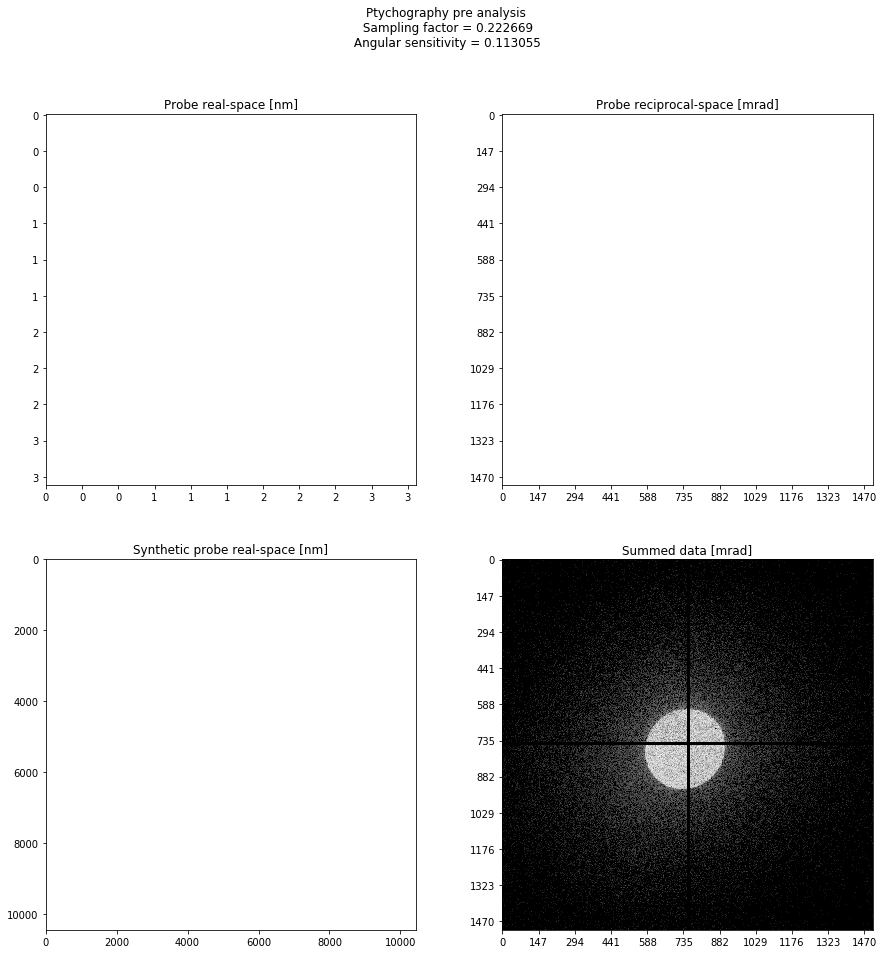

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,15])
angular_sensitivity = np.arctan(1/(probe_width/dx)) * (180/np.pi)
plt.suptitle('Ptychography pre analysis\n Sampling factor = %f\n Angular sensitivity = %f' %(s_factor,angular_sensitivity))
plt.gray()

ar_sz = probe.shape
d_theta = pty_model.detector.pp[0] / pty_model.detector.dist
print("d_theta", d_theta)
x_positions = np.arange(0,ar_sz[0],50)
x_labels = np.int32(x_positions * dx * 1e9)
plt.subplot(2,2,1)
plt.imshow(np.abs(probe))
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Probe real-space [nm]')

x_positions = np.arange(0,ar_sz[0],50)
x_labels = np.int32(x_positions * d_theta * 1e3)
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(probe)))))
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Probe reciprocal-space [mrad]')

plt.subplot(2,2,3)
plt.title('Synthetic probe real-space [nm]')
plt.imshow(np.abs(s_probe))

data_sum = np.fft.fftshift(np.sum(pty_data.pro,(0)))
mask = (1-np.fft.fftshift(pty_model.detector.dead_pix))

plt.subplot(2,2,4)
data_im = np.log(data_sum)
data_im[data_sum==0] = 0
data_im *= mask
# pty_model.detector.dead_pix[pty_model.detector.dead_pix==True] = 1
# pty_model.detector.dead_pix[pty_model.detector.dead_pix==False] = 0
plt.imshow(data_im)
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Summed data [mrad]')
plt.show()

In [12]:
%matplotlib qt5
data_max = np.amax(pty_data.pro)
print(data_max)
pty_data.pro[pty_data.pro>(data_max-1)] = 0
data = np.reshape(np.fft.fftshift(pty_data.pro,(-2,-1)),[scan_n[0],scan_n[1],pty_data.pro.shape[-2],pty_data.pro.shape[-1]])
data = tb.bsx_times(data, mask)
data_sum = np.sum(data,(0,1))
#data_sum *= mask
ap = np.abs(ptyrex.core.toolbox.genAp(data.shape[-2:],20))
stxm_full = np.sum(data,(-2,-1))
stxm_bf = np.sum(ptyrex.core.toolbox.bsx_times(data, ap),(-2,-1))
stxm_df = np.sum(ptyrex.core.toolbox.bsx_times(data, (1-ap)),(-2,-1))

2020-06-19 13:21:35,457:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.


63


/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
2020-06-19 13:21:37,383:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:37,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:37,492:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:37,493:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 

Pixel size: [8.32921403e-09]


2020-06-19 13:21:37,591:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-19 13:21:37,592:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,593:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:37,594:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,595:/dls_sw/apps/pyt

2020-06-19 13:21:37,620:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,621:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:37,622:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,623:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,623:/dls_sw/apps/python/anaconda/4

2020-06-19 13:21:37,657:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,657:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:37,658:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,659:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,659:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyt

2020-06-19 13:21:37,685:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,685:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:37,686:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,687:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-19 13:21:37,687:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-19 13:21:37,710:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 10.24
2020-06-19 13:21:37,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-19 13:21:37,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:37,712:/dls_sw/apps/python/

2020-06-19 13:21:37,730:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:37,730:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,731:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,731:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-19 13:21:37,732:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-19 13:21:37,748:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:37,749:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,749:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:37,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,750:/dls_sw/apps/python/anaconda/

2020-06-19 13:21:37,775:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:37,776:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-19 13:21:37,776:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:37,777:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,777:/

2020-06-19 13:21:37,793:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 11.535
2020-06-19 13:21:37,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS56F.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:37,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:37,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,795:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/

2020-06-19 13:21:37,814:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 11.05
2020-06-19 13:21:37,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 10.35
2020-06-19 13:21:37,816:/dls_sw/apps/python/anacond

2020-06-19 13:21:37,831:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 11.525
2020-06-19 13:21:37,831:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal bold condensed>) = 11.535
2020-06-19 13:21:37,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:37,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:37,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-19 13:21:37,847:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 10.335
2020-06-19 13:21:37,848:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:37,848:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 10.34
2020-06-19 13:21:37,849:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:37,849:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-19 13:21:37,864:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 10.634999999999998
2020-06-19 13:21:37,864:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,865:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,865:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,866:/dls_sw/apps/python/anaconda/4.

2020-06-19 13:21:37,881:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 10.434999999999999
2020-06-19 13:21:37,881:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Medium.ttf) normal normal medium normal>) = 11.145
2020-06-19 13:21:37,882:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 11.05
2020-06-19 13:21:37,882:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:37,883:/dls_sw/apps/python/anaco

2020-06-19 13:21:37,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:37,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,913:/dls_sw/apps/python/anaconda/4.6.14

2020-06-19 13:21:37,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:37,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 0.05
2020-06-19 13:21:37,930:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,930:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-19 13:21:37,931:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-19 13:21:37,954:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:37,955:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:37,956:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,956:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-19 13:21:37,957:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-19 13:21:37,977:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:37,977:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,978:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-19 13:21:37,978:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:37,979:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-19 13:21:37,996:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,996:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-19 13:21:37,997:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:37,997:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:37,998:/dls_s

2020-06-19 13:21:38,014:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,015:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,015:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-19 13:21:38,016:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,016:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-19 13:21:38,033:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,033:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,034:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,034:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,035:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-19 13:21:38,057:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-19 13:21:38,057:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:38,058:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,058:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:38,059:/dls_s

2020-06-19 13:21:38,074:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS56F.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:38,075:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:38,075:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,076:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:38,076:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-

2020-06-19 13:21:38,098:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,098:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 11.05
2020-06-19 13:21:38,099:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 10.35
2020-06-19 13:21:38,100:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:38,100:/dls_sw/apps/python/ana

2020-06-19 13:21:38,120:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal bold condensed>) = 11.535
2020-06-19 13:21:38,120:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:38,121:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:38,121:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:38,122:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-19 13:21:38,144:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:38,145:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 10.34
2020-06-19 13:21:38,145:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:38,146:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-19 13:21:38,146:/dls_sw/apps/py

2020-06-19 13:21:38,167:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,167:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,168:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,168:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:38,169:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-pac

2020-06-19 13:21:38,186:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Medium.ttf) normal normal medium normal>) = 11.145
2020-06-19 13:21:38,186:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 11.05
2020-06-19 13:21:38,187:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:38,187:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:38,188:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-19 13:21:38,212:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
2020-06-19 13:21:38,212:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.335
2020-06-19 13:21:38,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.0
2020-06-19 13:21:38,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.335
2020-06-19 13:21:38,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-19 13:21:38,232:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:38,232:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,234:/dls_sw/apps/python/anaconda/4.6.

2020-06-19 13:21:38,249:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,250:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:38,253:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,253:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,254:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages

2020-06-19 13:21:38,272:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-LightItalic.ttf) italic normal light normal>) = 11.24
2020-06-19 13:21:38,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-19 13:21:38,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-19 13:21:38,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,292:/dls_sw/apps/python/anaconda/4.

2020-06-19 13:21:38,307:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,307:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
2020-06-19 13:21:38,308:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:38,309:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,309:/dls_sw/apps/python/a

2020-06-19 13:21:38,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,336:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,337:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,338:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,339:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/f

2020-06-19 13:21:38,362:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-19 13:21:38,362:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,363:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PakType Naskh Basic' (PakTypeNaskhBasic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,364:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:38,365:/

2020-06-19 13:21:38,388:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,388:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,389:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,389:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,390:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-19 13:21:38,408:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,409:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,409:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:38,410:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,410:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-19 13:21:38,428:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,428:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:38,429:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,429:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,430:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-19 13:21:38,446:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:38,447:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,447:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,448:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,448:/dls_sw/apps/python/anaconda/

2020-06-19 13:21:38,463:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,464:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,464:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,465:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,465:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-19 13:21:38,480:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,481:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-19 13:21:38,481:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-19 13:21:38,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-19 13:21:38,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-19 13:21:38,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-19 13:21:38,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=STIXSizeTwoSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeTwoSym ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf') with score of 0.050000.
2020-06-19 13:21:38,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplo

2020-06-19 13:21:38,522:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,522:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,522:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,523:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,523:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-19 13:21:38,538:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,538:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,539:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,539:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,539:/dls_sw/apps/python/anaconda/4.6.

2020-06-19 13:21:38,554:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,554:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,555:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,555:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:38,556:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-19 13:21:38,570:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,570:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-19 13:21:38,571:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,571:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,572:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-19 13:21:38,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-19 13:21:38,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:38,612:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,612:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,613:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-19 13:21:38,627:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,629:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,629:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-19 13:21:38,649:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,649:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,650:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,650:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,651:/dls_sw/apps/python/anaconda/4.6.14/64/envs/

2020-06-19 13:21:38,666:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,666:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:38,667:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,667:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:38,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-19 13:21:38,683:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-19 13:21:38,683:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,684:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,684:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,685:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-19 13:21:38,700:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,700:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,701:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,701:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,701:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-19 13:21:38,716:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,717:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,717:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:38,718:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,718:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-19 13:21:38,733:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,733:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,734:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-19 13:21:38,734:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,735:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-19 13:21:38,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,752:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-19 13:21:38,776:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,776:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,777:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,777:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:38,777:/dls_sw/apps/python/

2020-06-19 13:21:38,792:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,792:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,793:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,793:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,794:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-19 13:21:38,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-19 13:21:38,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,809:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,809:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 11.145
2020-06-19 13:21:38,810:/dls_sw/a

2020-06-19 13:21:38,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,824:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,825:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,825:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 11.05
2020-06-19 13:21:38,826:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-19 13:21:38,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 10.535
2020-06-19 13:21:38,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:38,842:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,842:/dls_sw/apps/python/anaconda/4.6.14

2020-06-19 13:21:38,856:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,857:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:38,857:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,857:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:38,858:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-19 13:21:38,872:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,873:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,873:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-19 13:21:38,874:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25
2020-06-19 13:21:38,874:/dls_sw/apps/python/anaconda/4.6.

2020-06-19 13:21:38,891:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:38,892:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:38,892:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,893:/dls_sw/apps/python/anaconda/4.6.

2020-06-19 13:21:38,908:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,908:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:38,909:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,909:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,910:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages

2020-06-19 13:21:38,924:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,925:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,925:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,926:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-LightItalic.ttf) italic normal light normal>) = 11.24
2020-06-19 13:21:38,926:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-19 13:21:38,942:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,942:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,943:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-19 13:21:38,943:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:38,944:/dls_sw/apps/python/anaconda/4.

2020-06-19 13:21:38,959:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,960:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
2020-06-19 13:21:38,960:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:38,961:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:38,962:/dls_sw/apps/python/a

2020-06-19 13:21:39,006:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,007:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,008:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,009:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,009:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/f

2020-06-19 13:21:39,038:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-19 13:21:39,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PakType Naskh Basic' (PakTypeNaskhBasic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,040:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:39,041:/

2020-06-19 13:21:39,065:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,066:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,066:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,067:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,068:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-19 13:21:39,089:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,089:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:39,090:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,091:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,091:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-19 13:21:39,111:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:39,111:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:39,112:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:39,112:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-19 13:21:39,113:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-19 13:21:39,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,132:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,132:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-19 13:21:39,133:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-19 13:21:39,149:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,150:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,150:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,151:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Regular.otf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,151:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matp

2020-06-19 13:21:39,168:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-19 13:21:39,168:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-19 13:21:39,169:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-19 13:21:39,169:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-19 13:21:39,170:/dls_sw/apps/python/

2020-06-19 13:21:39,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000.
2020-06-19 13:21:39,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-19 13:21:39,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/fon

2020-06-19 13:21:39,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:39,214:/dls_sw/apps/python/anaconda/4.6.

2020-06-19 13:21:39,229:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,229:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,230:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,230:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:39,231:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-19 13:21:39,245:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,246:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:39,246:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,247:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:39,247:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-19 13:21:39,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 10.24
2020-06-19 13:21:39,275:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,276:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-19 13:21:39,299:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-06-19 13:21:39,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 10.145
2020-06-19 13:21:39,301:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,302:/dls_sw/apps/python/anaconda/4.6

2020-06-19 13:21:39,359:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,360:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,360:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:39,361:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,361:/dls_sw/apps/python/anaconda/4.6

2020-06-19 13:21:39,384:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,385:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:39,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:39,387:/dls_sw/apps/pyt

2020-06-19 13:21:39,997:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:39,998:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:39,998:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:39,999:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-19 13:21:39,999:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-19 13:21:40,028:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,028:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,029:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,030:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Regular.otf) normal normal regular normal>) = 10.05
2020-06-19 13:21:40,030:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matp

2020-06-19 13:21:40,048:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-19 13:21:40,049:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-19 13:21:40,049:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-19 13:21:40,050:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-19 13:21:40,050:/dls_sw/apps/python/

2020-06-19 13:21:40,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2020-06-19 13:21:40,076:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=DejaVu Sans:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-19 13:21:40,077:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:40,078:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-p

2020-06-19 13:21:40,097:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,097:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:40,098:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:40,098:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 0.15000000000000002
2020-06-19 13:21:40,099:/dls_sw/apps/python

2020-06-19 13:21:40,122:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:40,123:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 10.05
2020-06-19 13:21:40,125:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-19 13:21:40,143:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 10.335
2020-06-19 13:21:40,144:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 11.25
2020-06-19 13:21:40,144:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:40,145:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-19 13:21:40,145:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-19 13:21:40,162:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 11.335
2020-06-19 13:21:40,162:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:40,163:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 11.24
2020-06-19 13:21:40,163:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-19 13:21:40,164:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-19 13:21:40,180:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 11.05
2020-06-19 13:21:40,180:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 11.05
2020-06-19 13:21:40,181:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 11.145
2020-06-19 13:21:40,181:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,182:/dls_sw/apps/python/anaconda/4.6

2020-06-19 13:21:40,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-19 13:21:40,199:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 11.05
2020-06-19 13:21:40,199:/dls_sw/apps/python/

2020-06-19 13:21:40,224:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.335
2020-06-19 13:21:40,225:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.0
2020-06-19 13:21:40,225:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.335
2020-06-19 13:21:40,226:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.0
2020-06-19 13:21:40,226:/dls_sw/apps/python/anaconda/4.6.14

2020-06-19 13:21:40,241:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,243:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
2020-06-19 13:21:40,243:/dls_sw/apps/

2020-06-19 13:21:40,258:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,258:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,259:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:40,259:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,259:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-19 13:21:40,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-19 13:21:40,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-19 13:21:40,275:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,275:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,276:/dls_sw/apps/

2020-06-19 13:21:40,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:40,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,292:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,292:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/si

2020-06-19 13:21:40,307:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-19 13:21:40,307:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:40,307:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 10.535
2020-06-19 13:21:40,308:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:40,308:/dls_sw/apps/python/anaconda/4

2020-06-19 13:21:40,323:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,323:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,324:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,324:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,324:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-19 13:21:40,339:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-19 13:21:40,339:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,340:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,340:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-19 13:21:40,341:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-19 13:21:40,363:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,364:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,364:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-19 13:21:40,365:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-19 13:21:40,365:/dls_sw/apps/python/anaconda/4.6.14

2020-06-19 13:21:40,394:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk-bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,395:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,395:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,396:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-19 13:21:40,396:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-19 13:21:40,417:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-RegularOblique.ttf) oblique normal regular normal>) = 11.05
2020-06-19 13:21:40,418:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-19 13:21:40,418:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,419:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,420:/dls_sw/apps/python/anaconda/4.6.14/64/e

2020-06-19 13:21:40,439:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal book normal>) = 11.05
2020-06-19 13:21:40,439:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight Italic.ttf) italic normal light normal>) = 11.24
2020-06-19 13:21:40,440:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,440:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,441:/dls_sw/apps/python/anac

2020-06-19 13:21:40,458:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
2020-06-19 13:21:40,458:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-SemiboldItalic.ttf) italic normal semibold normal>) = 11.24
2020-06-19 13:21:40,459:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,459:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-19 13:21:40,460:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-19 13:21:40,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:40,478:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-19 13:21:40,478:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,479:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-19 13:21:40,479:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-19 13:21:40,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2020-06-19 13:21:40,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-19 13:21:40,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2020-06-19 13:21:40,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-19 13:21:40,499:/dls_sw/apps/python/anaconda/4.6.14

2020-06-19 13:21:40,952:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:40,953:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:40,955:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:40,956:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:40,958:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin

2020-06-19 13:21:41,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:41,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:41,217:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:41,219:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:41,220:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:tick

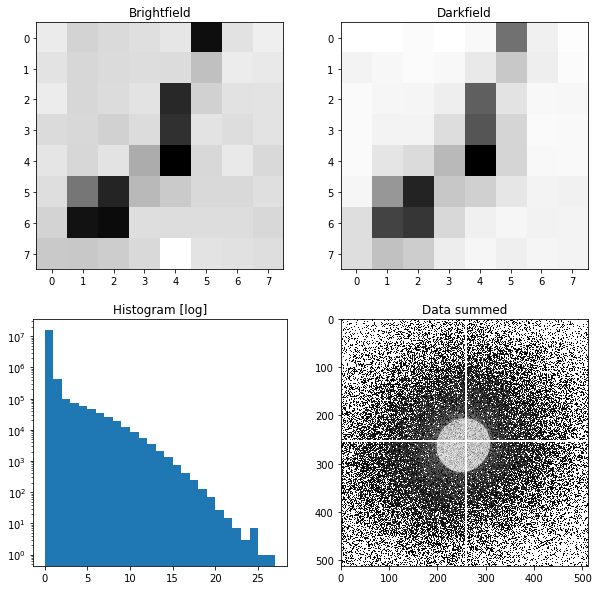

2020-06-19 13:21:42,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:42,791:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:42,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.4363618886783458 vmax 36577745.247971006
2020-06-19 13:21:42,795:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])
2020-06-19 13:21:42,798:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin

In [13]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.title('Brightfield')
plt.imshow(stxm_bf)
plt.subplot(2,2,2)
plt.title('Darkfield')
plt.imshow(stxm_df)
plt.subplot(2,2,3)
plt.title('Histogram [log]')
plt.hist(data.flatten(),bins=np.amax(data))
plt.yscale('log')
plt.subplot(2,2,4)
plt.title('Data summed')
plt.imshow(np.log(data_sum))
plt.show()

print("Pixel size:", scan_dr)